# Question 1: [Binary Classification]
Use UCI’s sentiment dataset (https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) to
perform binary classification to classify reviews into positive or 
negative. Use k-fold cross validation and show loss/accuracy plots by
epoch.

### Import the sentences with Pandas.

In [1]:
import pandas as pd

yelp_txt = 'sentiment labelled sentences/yelp_labelled.txt'
amaz_txt = 'sentiment labelled sentences/amazon_cells_labelled.txt'
imdb_txt = 'sentiment labelled sentences/imdb_labelled.txt'

yelp = pd.read_csv(yelp_txt, names=['sentence', 'mark'], sep='\t')
amaz = pd.read_csv(amaz_txt, names=['sentence', 'mark'], sep='\t')
imdb = pd.read_csv(imdb_txt, names=['sentence', 'mark'], sep='\t')

Let's see if they are correct

In [2]:
yelp.head()

,sentence,mark
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
amaz.head()

,sentence,mark
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
imdb.head()

,sentence,mark
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


### Preprocessing for sentences

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

yelp_sentences = yelp.sentence
amaz_sentences = amaz.sentence
imdb_sentences = imdb.sentence

yelp_vectorizer = CountVectorizer()
yelp_vectorizer.fit(yelp_sentences)
amaz_vectorizer = CountVectorizer()
amaz_vectorizer.fit(amaz_sentences)
imdb_vectorizer = CountVectorizer()
imdb_vectorizer.fit(imdb_sentences)

yelp_x_data = yelp_vectorizer.transform(yelp_sentences)
amaz_x_data = amaz_vectorizer.transform(amaz_sentences)
imdb_x_data = imdb_vectorizer.transform(imdb_sentences)

yelp_y_data = yelp.mark
amaz_y_data = amaz.mark
imdb_y_data = imdb.mark

### Split the data to kfolds

In [6]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
    
k = 10
yelp_folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(yelp_x_data, yelp_y_data))
amaz_folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(amaz_x_data, amaz_y_data))
imdb_folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(imdb_x_data, imdb_y_data))

### Create a basic model

In [14]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

input_dim = yelp_x_data.shape[1]

history = []

for j, (train_idx, val_idx) in enumerate(yelp_folds):
    X_train_cv = yelp_x_data[train_idx]
    Y_train_cv = yelp_y_data[train_idx]
    X_valid_cv = yelp_x_data[val_idx]
    Y_valid_cv = yelp_y_data[val_idx]
    model = Sequential()
    model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    model.summary()
    
    history.append(model.fit(X_train_cv, Y_train_cv,
                        epochs=100,
                        verbose=True,
                        validation_data=(X_valid_cv, Y_valid_cv),
                        batch_size=50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                130304    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 130,369
Trainable params: 130,369
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 780us/step - loss: 0.6802 - acc: 0.6056 - val_loss: 0.6678 - val_acc: 0.6700
Epoch 2/100
900/900 [==============================] - 0s 94us/step - loss: 0.6098 - acc: 0.8600 - val_loss: 0.6316 - val_acc: 0.7300
Epoch 3/100
900/900 [==============================] - 0s 86us/step - loss: 0.5280 - acc: 0.9111 - val_loss: 0.5843 - val_acc: 0.7500
Epoch 4/100
900/900 [==============================] - 0s 90us/step - loss: 0.4373 

Epoch 57/100
900/900 [==============================] - 0s 89us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.5541 - val_acc: 0.8100
Epoch 58/100
900/900 [==============================] - 0s 84us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.5566 - val_acc: 0.8100
Epoch 59/100
900/900 [==============================] - 0s 94us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.5598 - val_acc: 0.8100
Epoch 60/100
900/900 [==============================] - 0s 99us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.5621 - val_acc: 0.8100
Epoch 61/100
900/900 [==============================] - 0s 90us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.5652 - val_acc: 0.8100
Epoch 62/100
900/900 [==============================] - 0s 90us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.5673 - val_acc: 0.8100
Epoch 63/100
900/900 [==============================] - 0s 87us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.5698 - val_acc: 0.8100
Epoch 64/100
900/900 [==============================] -

Epoch 13/100
900/900 [==============================] - 0s 82us/step - loss: 0.0763 - acc: 0.9944 - val_loss: 0.3823 - val_acc: 0.8000
Epoch 14/100
900/900 [==============================] - 0s 80us/step - loss: 0.0661 - acc: 0.9956 - val_loss: 0.3808 - val_acc: 0.8100
Epoch 15/100
900/900 [==============================] - 0s 79us/step - loss: 0.0580 - acc: 0.9967 - val_loss: 0.3796 - val_acc: 0.8100
Epoch 16/100
900/900 [==============================] - 0s 82us/step - loss: 0.0509 - acc: 0.9978 - val_loss: 0.3804 - val_acc: 0.8100
Epoch 17/100
900/900 [==============================] - 0s 82us/step - loss: 0.0452 - acc: 0.9978 - val_loss: 0.3790 - val_acc: 0.8000
Epoch 18/100
900/900 [==============================] - 0s 83us/step - loss: 0.0403 - acc: 0.9989 - val_loss: 0.3810 - val_acc: 0.8000
Epoch 19/100
900/900 [==============================] - 0s 82us/step - loss: 0.0362 - acc: 0.9989 - val_loss: 0.3809 - val_acc: 0.8000
Epoch 20/100
900/900 [==============================] -

Epoch 74/100
900/900 [==============================] - 0s 80us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4941 - val_acc: 0.8100
Epoch 75/100
900/900 [==============================] - 0s 86us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4959 - val_acc: 0.8100
Epoch 76/100
900/900 [==============================] - 0s 82us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4976 - val_acc: 0.8100
Epoch 77/100
900/900 [==============================] - 0s 82us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4994 - val_acc: 0.8100
Epoch 78/100
900/900 [==============================] - 0s 84us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5008 - val_acc: 0.8100
Epoch 79/100
900/900 [==============================] - 0s 88us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5027 - val_acc: 0.8100
Epoch 80/100
900/900 [==============================] - 0s 81us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5045 - val_acc: 0.8100
Epoch 81/100
900/900 [==============================] -

Epoch 30/100
900/900 [==============================] - 0s 92us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.6403 - val_acc: 0.7800
Epoch 31/100
900/900 [==============================] - 0s 82us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.6452 - val_acc: 0.7800
Epoch 32/100
900/900 [==============================] - 0s 90us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.6521 - val_acc: 0.7800
Epoch 33/100
900/900 [==============================] - 0s 86us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 0.6572 - val_acc: 0.7800
Epoch 34/100
900/900 [==============================] - 0s 86us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.6637 - val_acc: 0.7800
Epoch 35/100
900/900 [==============================] - 0s 86us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.6688 - val_acc: 0.7800
Epoch 36/100
900/900 [==============================] - 0s 89us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.6759 - val_acc: 0.7800
Epoch 37/100
900/900 [==============================] -

900/900 [==============================] - 0s 93us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.8751 - val_acc: 0.7600
Epoch 91/100
900/900 [==============================] - 0s 82us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.8810 - val_acc: 0.7600
Epoch 92/100
900/900 [==============================] - 0s 78us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.8835 - val_acc: 0.7600
Epoch 93/100
900/900 [==============================] - 0s 79us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.8853 - val_acc: 0.7600
Epoch 94/100
900/900 [==============================] - 0s 78us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.8870 - val_acc: 0.7600
Epoch 95/100
900/900 [==============================] - 0s 73us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.8892 - val_acc: 0.7600
Epoch 96/100
900/900 [==============================] - 0s 73us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8910 - val_acc: 0.7600
Epoch 97/100
900/900 [==============================] - 0s 78us/step

Epoch 46/100
900/900 [==============================] - 0s 78us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.5342 - val_acc: 0.8100
Epoch 47/100
900/900 [==============================] - 0s 79us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.5374 - val_acc: 0.8100
Epoch 48/100
900/900 [==============================] - 0s 79us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.5404 - val_acc: 0.8100
Epoch 49/100
900/900 [==============================] - 0s 80us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.5437 - val_acc: 0.8100
Epoch 50/100
900/900 [==============================] - 0s 76us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.5475 - val_acc: 0.8100
Epoch 51/100
900/900 [==============================] - 0s 76us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.5499 - val_acc: 0.8100
Epoch 52/100
900/900 [==============================] - 0s 81us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.5551 - val_acc: 0.8100
Epoch 53/100
900/900 [==============================] -

Epoch 2/100
900/900 [==============================] - 0s 87us/step - loss: 0.6137 - acc: 0.8411 - val_loss: 0.6154 - val_acc: 0.7900
Epoch 3/100
900/900 [==============================] - 0s 89us/step - loss: 0.5347 - acc: 0.9100 - val_loss: 0.5610 - val_acc: 0.8100
Epoch 4/100
900/900 [==============================] - 0s 87us/step - loss: 0.4434 - acc: 0.9322 - val_loss: 0.5035 - val_acc: 0.8400
Epoch 5/100
900/900 [==============================] - 0s 91us/step - loss: 0.3544 - acc: 0.9522 - val_loss: 0.4570 - val_acc: 0.8200
Epoch 6/100
900/900 [==============================] - 0s 84us/step - loss: 0.2796 - acc: 0.9622 - val_loss: 0.4210 - val_acc: 0.8200
Epoch 7/100
900/900 [==============================] - 0s 102us/step - loss: 0.2209 - acc: 0.9756 - val_loss: 0.3958 - val_acc: 0.8300
Epoch 8/100
900/900 [==============================] - 0s 102us/step - loss: 0.1776 - acc: 0.9800 - val_loss: 0.3772 - val_acc: 0.8400
Epoch 9/100
900/900 [==============================] - 0s 99

Epoch 63/100
900/900 [==============================] - 0s 94us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4716 - val_acc: 0.8000
Epoch 64/100
900/900 [==============================] - 0s 97us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4734 - val_acc: 0.8000
Epoch 65/100
900/900 [==============================] - 0s 92us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4762 - val_acc: 0.8000
Epoch 66/100
900/900 [==============================] - 0s 91us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4776 - val_acc: 0.8000
Epoch 67/100
900/900 [==============================] - 0s 86us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4806 - val_acc: 0.8000
Epoch 68/100
900/900 [==============================] - 0s 83us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4817 - val_acc: 0.8000
Epoch 69/100
900/900 [==============================] - 0s 88us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4849 - val_acc: 0.8000
Epoch 70/100
900/900 [==============================] -

Epoch 19/100
900/900 [==============================] - 0s 77us/step - loss: 0.0353 - acc: 0.9978 - val_loss: 0.4195 - val_acc: 0.8600
Epoch 20/100
900/900 [==============================] - 0s 77us/step - loss: 0.0317 - acc: 0.9978 - val_loss: 0.4242 - val_acc: 0.8500
Epoch 21/100
900/900 [==============================] - 0s 79us/step - loss: 0.0288 - acc: 1.0000 - val_loss: 0.4298 - val_acc: 0.8500
Epoch 22/100
900/900 [==============================] - 0s 77us/step - loss: 0.0261 - acc: 1.0000 - val_loss: 0.4352 - val_acc: 0.8500
Epoch 23/100
900/900 [==============================] - 0s 74us/step - loss: 0.0239 - acc: 1.0000 - val_loss: 0.4407 - val_acc: 0.8500
Epoch 24/100
900/900 [==============================] - 0s 78us/step - loss: 0.0219 - acc: 1.0000 - val_loss: 0.4467 - val_acc: 0.8500
Epoch 25/100
900/900 [==============================] - 0s 86us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.4507 - val_acc: 0.8500
Epoch 26/100
900/900 [==============================] -

900/900 [==============================] - 0s 82us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6553 - val_acc: 0.8100
Epoch 80/100
900/900 [==============================] - 0s 91us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6573 - val_acc: 0.8100
Epoch 81/100
900/900 [==============================] - 0s 89us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6595 - val_acc: 0.8100
Epoch 82/100
900/900 [==============================] - 0s 100us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6628 - val_acc: 0.8100
Epoch 83/100
900/900 [==============================] - 0s 89us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6656 - val_acc: 0.8100
Epoch 84/100
900/900 [==============================] - 0s 100us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6683 - val_acc: 0.8100
Epoch 85/100
900/900 [==============================] - 0s 99us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6711 - val_acc: 0.8100
Epoch 86/100
900/900 [==============================] - 0s 102us/s

900/900 [==============================] - 0s 94us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.5434 - val_acc: 0.8300
Epoch 36/100
900/900 [==============================] - 0s 87us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5512 - val_acc: 0.8300
Epoch 37/100
900/900 [==============================] - 0s 92us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.5557 - val_acc: 0.8300
Epoch 38/100
900/900 [==============================] - 0s 80us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 0.5617 - val_acc: 0.8300
Epoch 39/100
900/900 [==============================] - 0s 93us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.5677 - val_acc: 0.8300
Epoch 40/100
900/900 [==============================] - 0s 87us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.5719 - val_acc: 0.8300
Epoch 41/100
900/900 [==============================] - 0s 90us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5757 - val_acc: 0.8300
Epoch 42/100
900/900 [==============================] - 0s 89us/step

Epoch 96/100
900/900 [==============================] - 0s 83us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7666 - val_acc: 0.8200
Epoch 97/100
900/900 [==============================] - 0s 79us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7691 - val_acc: 0.8200
Epoch 98/100
900/900 [==============================] - 0s 80us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7719 - val_acc: 0.8200
Epoch 99/100
900/900 [==============================] - 0s 77us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.7744 - val_acc: 0.8200
Epoch 100/100
900/900 [==============================] - 0s 87us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.7773 - val_acc: 0.8200
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                130304    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65   

Epoch 52/100
900/900 [==============================] - 0s 94us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3166 - val_acc: 0.8900
Epoch 53/100
900/900 [==============================] - 0s 100us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3189 - val_acc: 0.8900
Epoch 54/100
900/900 [==============================] - 0s 94us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3200 - val_acc: 0.8900
Epoch 55/100
900/900 [==============================] - 0s 98us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3215 - val_acc: 0.8900
Epoch 56/100
900/900 [==============================] - 0s 89us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3232 - val_acc: 0.8900
Epoch 57/100
900/900 [==============================] - 0s 81us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3246 - val_acc: 0.8900
Epoch 58/100
900/900 [==============================] - 0s 86us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3265 - val_acc: 0.8900
Epoch 59/100
900/900 [==============================] 

Epoch 8/100
900/900 [==============================] - 0s 82us/step - loss: 0.1896 - acc: 0.9767 - val_loss: 0.3516 - val_acc: 0.8500
Epoch 9/100
900/900 [==============================] - 0s 80us/step - loss: 0.1540 - acc: 0.9867 - val_loss: 0.3338 - val_acc: 0.8600
Epoch 10/100
900/900 [==============================] - 0s 82us/step - loss: 0.1280 - acc: 0.9889 - val_loss: 0.3243 - val_acc: 0.8600
Epoch 11/100
900/900 [==============================] - 0s 81us/step - loss: 0.1074 - acc: 0.9933 - val_loss: 0.3193 - val_acc: 0.8600
Epoch 12/100
900/900 [==============================] - 0s 87us/step - loss: 0.0916 - acc: 0.9944 - val_loss: 0.3140 - val_acc: 0.8700
Epoch 13/100
900/900 [==============================] - 0s 92us/step - loss: 0.0782 - acc: 0.9956 - val_loss: 0.3145 - val_acc: 0.8700
Epoch 14/100
900/900 [==============================] - 0s 81us/step - loss: 0.0680 - acc: 0.9978 - val_loss: 0.3119 - val_acc: 0.8700
Epoch 15/100
900/900 [==============================] - 0

900/900 [==============================] - 0s 95us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4476 - val_acc: 0.8300
Epoch 69/100
900/900 [==============================] - 0s 98us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4502 - val_acc: 0.8300
Epoch 70/100
900/900 [==============================] - 0s 93us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4520 - val_acc: 0.8300
Epoch 71/100
900/900 [==============================] - 0s 83us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4537 - val_acc: 0.8300
Epoch 72/100
900/900 [==============================] - 0s 83us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4560 - val_acc: 0.8300
Epoch 73/100
900/900 [==============================] - 0s 82us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4579 - val_acc: 0.8300
Epoch 74/100
900/900 [==============================] - 0s 83us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4602 - val_acc: 0.8300
Epoch 75/100
900/900 [==============================] - 0s 87us/step

900/900 [==============================] - 0s 84us/step - loss: 0.0219 - acc: 1.0000 - val_loss: 0.4280 - val_acc: 0.8200
Epoch 25/100
900/900 [==============================] - 0s 83us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.4286 - val_acc: 0.8300
Epoch 26/100
900/900 [==============================] - 0s 91us/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.4384 - val_acc: 0.8200
Epoch 27/100
900/900 [==============================] - 0s 82us/step - loss: 0.0172 - acc: 1.0000 - val_loss: 0.4430 - val_acc: 0.8200
Epoch 28/100
900/900 [==============================] - 0s 84us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.4477 - val_acc: 0.8200
Epoch 29/100
900/900 [==============================] - 0s 101us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 0.4493 - val_acc: 0.8200
Epoch 30/100
900/900 [==============================] - 0s 108us/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.8200
Epoch 31/100
900/900 [==============================] - 0s 92us/st

Epoch 85/100
900/900 [==============================] - 0s 91us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6683 - val_acc: 0.7800
Epoch 86/100
900/900 [==============================] - 0s 82us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6730 - val_acc: 0.7800
Epoch 87/100
900/900 [==============================] - 0s 82us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6764 - val_acc: 0.7800
Epoch 88/100
900/900 [==============================] - 0s 84us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6791 - val_acc: 0.7800
Epoch 89/100
900/900 [==============================] - 0s 90us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6806 - val_acc: 0.7800
Epoch 90/100
900/900 [==============================] - 0s 88us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 0.7900
Epoch 91/100
900/900 [==============================] - 0s 86us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6875 - val_acc: 0.7900
Epoch 92/100
900/900 [==============================] -

### Plot the results!

In [28]:
import matplotlib.pyplot as plt

def plot_results(history, folds, source):
    
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for k,fold in enumerate(folds):
        acc.append(history[k].history['acc'])
        val_acc.append(history[k].history['val_acc'])
        loss.append(history[k].history['loss'])
        val_loss.append(history[k].history['val_loss'])
    
    acc = np.transpose(acc)
    val_acc = np.transpose(val_acc)
    loss = np.transpose(loss)
    val_loss = np.transpose(val_loss)
    
    plt.plot(acc)
    plt.title(source +  ' - model accuracy on training samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_acc)
    plt.title(source +  ' - model accuracy on validation samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

    plt.plot(loss)
    plt.title(source + ' - model training loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_loss)
    plt.title(source + ' - model validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    return acc, val_acc, loss, val_loss

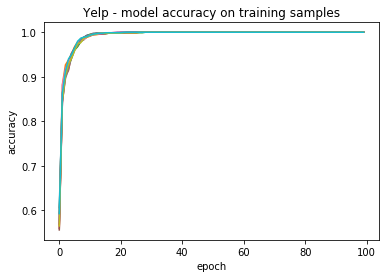

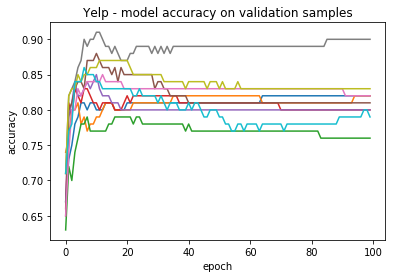

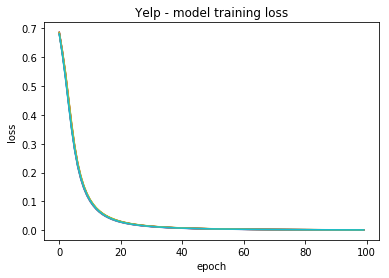

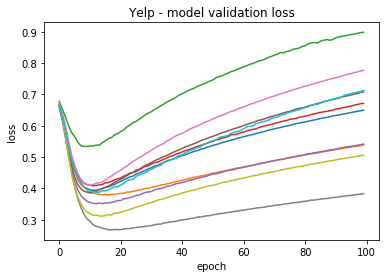

In [29]:
acc, val_acc, loss, val_loss = plot_results(history, yelp_folds, 'Yelp')

On the figure, every color is a different fold. Instead of creating 10 figures, I stitched every fold together and printed as the same figure. All of them have ran 100 epochs.

We can see the both train accuracy quickly converged to 1 after 15 epochs. However, our model overfits. We see that the validation data is confused.

### Do the same for Amazon and IMDB datasets

In [34]:
input_dim = amaz_x_data.shape[1]

def build_model(input_dim, x_data, y_data, folds, verbose=False):

    history_cr = []

    for j, (train_idx, val_idx) in enumerate(folds):
        X_train_cv = x_data[train_idx]
        Y_train_cv = y_data[train_idx]
        X_valid_cv = x_data[val_idx]
        Y_valid_cv = y_data[val_idx]
        model = Sequential()
        model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        
        history_cr.append(model.fit(X_train_cv, Y_train_cv,
                            epochs=100,
                            verbose=verbose,
                            validation_data=(X_valid_cv, Y_valid_cv),
                            batch_size=50))
    return history_cr

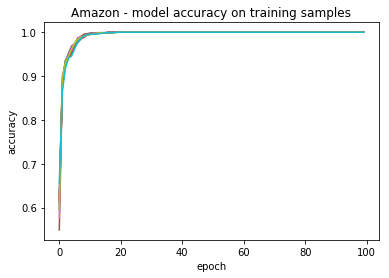

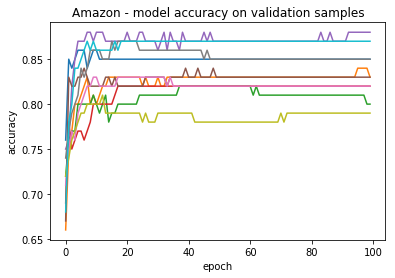

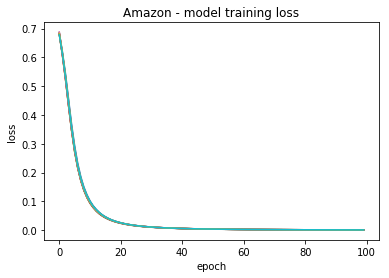

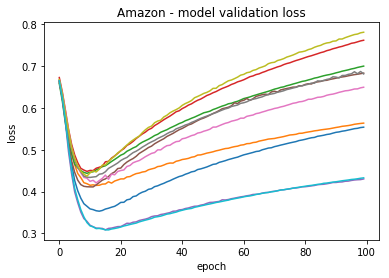

In [35]:
history = build_model(amaz_x_data.shape[1], amaz_x_data, amaz_y_data, amaz_folds, verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, amaz_folds, 'Amazon')

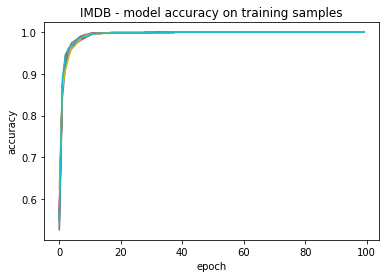

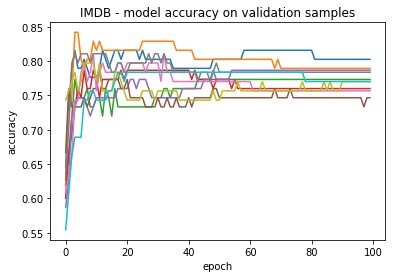

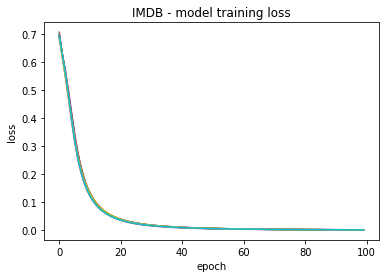

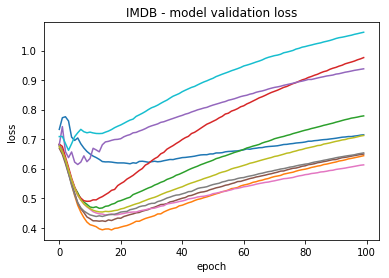

In [36]:
history = build_model(imdb_x_data.shape[1], imdb_x_data, imdb_y_data, imdb_folds, verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, imdb_folds, 'IMDB')

### Do everything without splitting datasets

In [37]:
filepath_dict = {'yelp':   'sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': 'sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   'sentiment labelled sentences/imdb_labelled.txt'}

all_txt = []

for source, filepath in filepath_dict.items():
    data = pd.read_csv(filepath, names=['sentence', 'mark'], sep='\t')
    all_txt.append(data)

all = pd.concat(all_txt)

sentences = all.sentence

all_vectorizer = CountVectorizer()
all_vectorizer.fit(sentences)

all_x_data = all_vectorizer.transform(sentences)

all_y_data = all['mark'].values

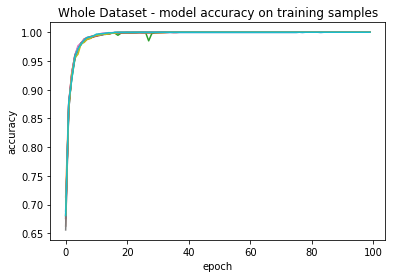

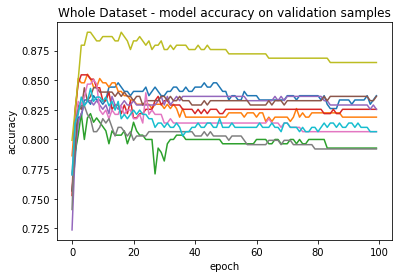

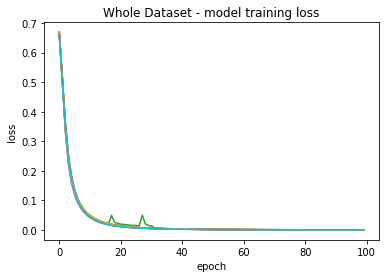

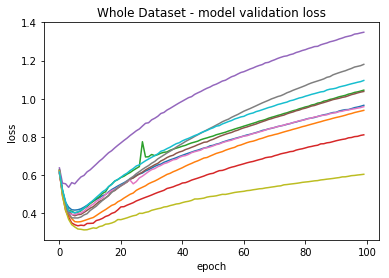

In [38]:
k = 10
all_folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(all_x_data, all_y_data))

history = build_model(all_x_data.shape[1], all_x_data, all_y_data, all_folds, verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset')

Here is the results for the same model on the overall dataset

## Question 1.a)- Try a different activation function and report the difference.

Instead of RELU activation, we will try softmax. (Here, I will reduce epochs to 50 and k=5 because the network converges around 30th epoch, and having k=10 is time consuming.)

In [39]:
k = 5
all_folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(all_x_data, all_y_data))

def build_model_with_options(input_dim, x_data, y_data, folds, activation, optimizer, verbose=False):

    history_cr = []

    for j, (train_idx, val_idx) in enumerate(folds):
        X_train_cv = x_data[train_idx]
        Y_train_cv = y_data[train_idx]
        X_valid_cv = x_data[val_idx]
        Y_valid_cv = y_data[val_idx]
        model = Sequential()
        model.add(layers.Dense(64, input_dim=input_dim, activation=activation))
        model.add(layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', 
                      optimizer=optimizer, 
                      metrics=['accuracy'])
        
        history_cr.append(model.fit(X_train_cv, Y_train_cv,
                            epochs=50,
                            verbose=verbose,
                            validation_data=(X_valid_cv, Y_valid_cv),
                            batch_size=50))
    return history_cr

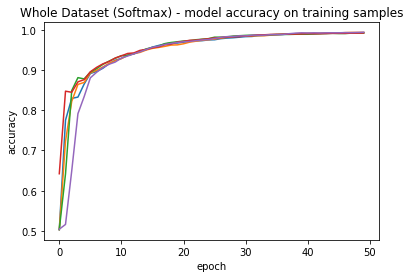

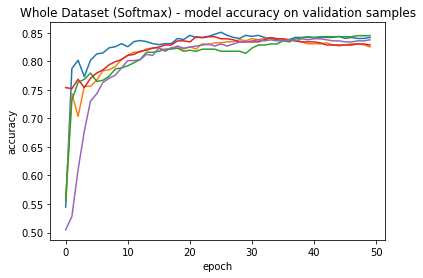

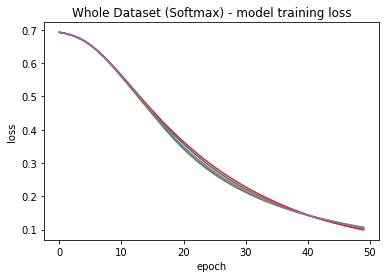

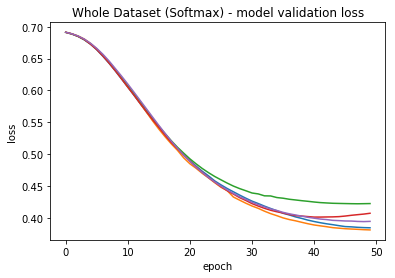

In [41]:
history = build_model_with_options(all_x_data.shape[1], all_x_data, all_y_data, all_folds, 'softmax', 'adam', verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset (Softmax)')

Let's try selu activation

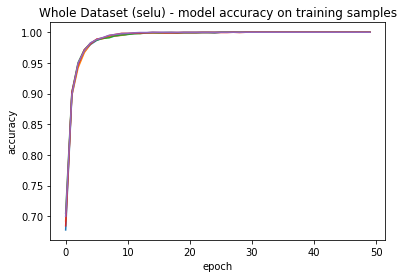

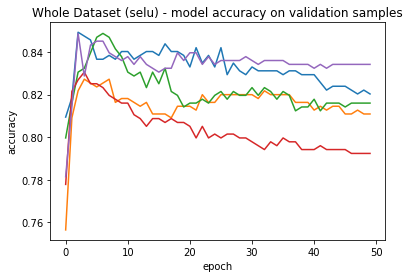

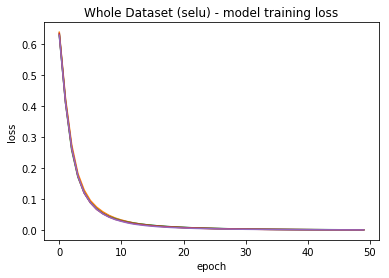

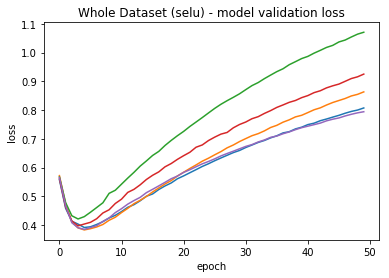

In [42]:
history = build_model_with_options(all_x_data.shape[1], all_x_data, all_y_data, all_folds, 'selu', 'adam', verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset (selu)')

## Question 1.b)- Try a different optimizer and report the difference.

Let's try RMSprop instead of Adam optimizer.

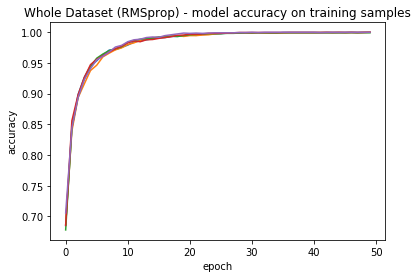

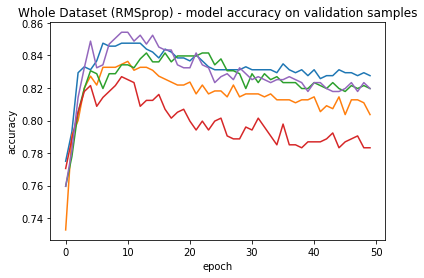

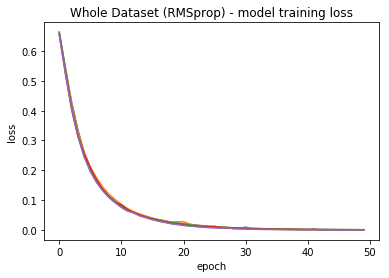

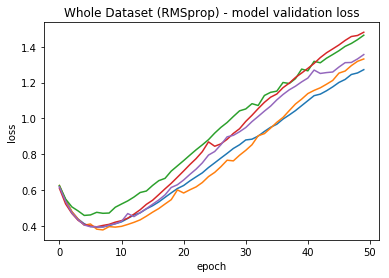

In [43]:
history = build_model_with_options(all_x_data.shape[1], all_x_data, all_y_data, all_folds, 'relu', 'rmsprop', verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset (RMSprop)')

Let's try Nesterov Adam optimizer.

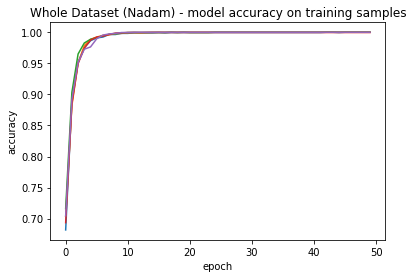

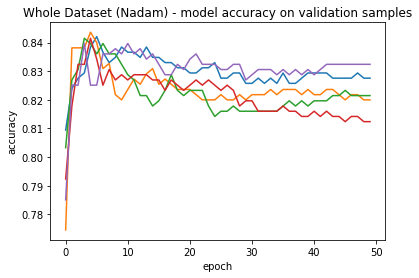

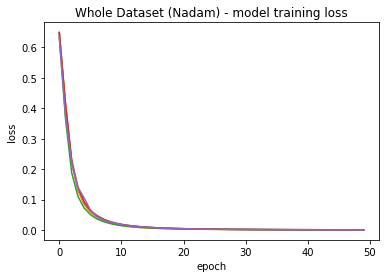

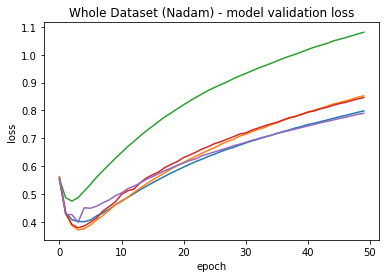

In [45]:
history = build_model_with_options(all_x_data.shape[1], all_x_data, all_y_data, all_folds, 'relu', 'nadam', verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset (Nadam)')

Let's try Stochastic Gradient Descent

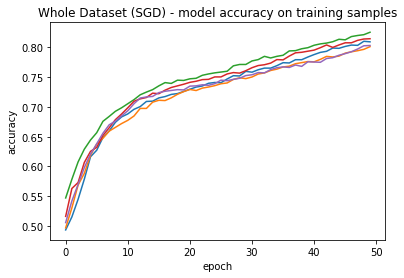

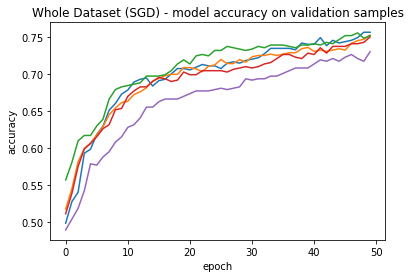

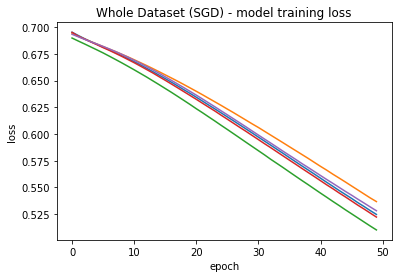

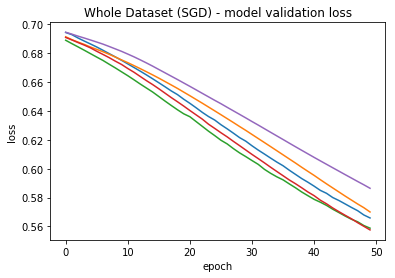

In [46]:
history = build_model_with_options(all_x_data.shape[1], all_x_data, all_y_data, all_folds, 'relu', 'sgd', verbose=False)
acc, val_acc, loss, val_loss = plot_results(history, all_folds, 'Whole Dataset (SGD)')